# Methane Sources

In [12]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib as mpl

from pathlib import Path
from PIL import Image
from dotenv import load_dotenv
from sqlalchemy import create_engine


In [7]:
BLUE = "#0059ff"
GOLD = "#fdbd28"
GREEN = "#28D9AA"
RED = "#EE5149"
METAL_SUN = "#AD8D40"
DARK_ORCHID = "#9A34D1"
MAGENTA = "#8A4859"
OXFORD = "#121C3B"
PINK = "#DB9995"
GREY = "#788995"


In [3]:
table_name = "epa_methane_sources"
engine = create_engine(os.getenv("PG_STRING"))
# SQL for querying an entire table
sql = f"""
    SELECT *
    FROM "bitdotio/cop26_methane"."{table_name}";
"""
# Return SQL query as a pandas dataframe
with engine.connect() as conn:
    # Set 1 minute statement timeout (units are milliseconds)
    conn.execute("SET statement_timeout = 60000;")
    df = pd.read_sql(sql, conn)

df.head()


,sector,year,mmt_co2_eq
0,Energy,1990,361.269410
1,Agriculture,1990,218.193730
2,Waste,1990,197.119663
3,"Land use, land-use change, and forestry",1990,4.952242
4,Industrial processes,1990,0.289891


In [22]:
df_2019 = df[(df["year"] == "2019") & (df["sector"] != "Total")]
df_2019['sector'].loc[df_2019.loc[:,'sector'] == "Land use, land-use change, and forestry"] = "Land use"
df_2019['sector'].loc[df_2019.loc[:,'sector'] == "Industrial processes"] = "Industry"
df_2019


/Users/danielliden/git/innerjoin/cop_methane/env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,sector,year,mmt_co2_eq
174,Energy,2019,267.597201
175,Agriculture,2019,256.404096
176,Waste,2019,135.348072
177,Land use,2019,13.796319
178,Industry,2019,0.363333


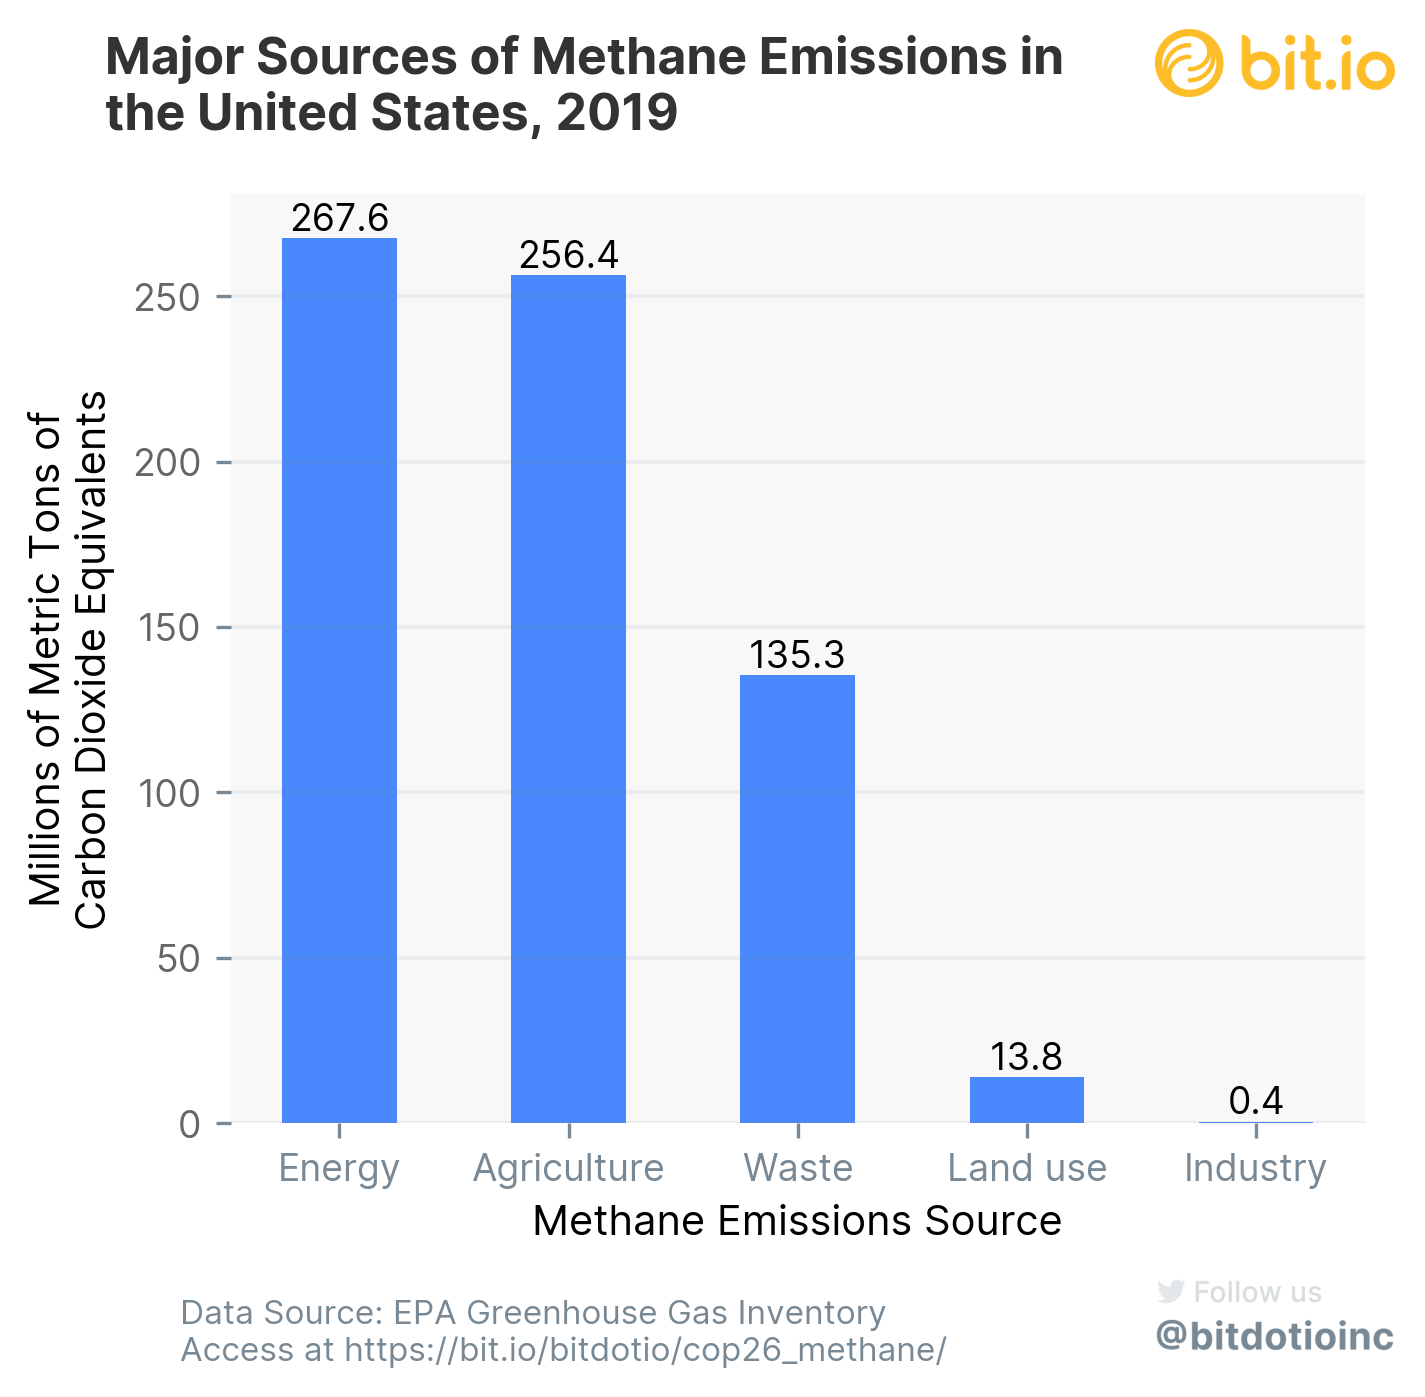

In [31]:
fig, ax = plt.subplots(figsize=(5, 4.75), dpi=300)

bar = ax.bar("sector", "mmt_co2_eq", data=df_2019, color=BLUE, alpha=0.7, width=0.5)

ax.bar_label(bar, fontfamily="Inter", size=9, fmt="%.1f")
# X axis
ax.set_xlabel("Methane Emissions Source")
ax.tick_params(axis="x", which="major", labelsize=9)
ax.patch.set_facecolor(GREY)
ax.patch.set_alpha(0.05)
# make axis ticks grey
ax.tick_params(axis="x", colors=GREY)


# Y Axis
ax.set_ylabel("Millions of Metric Tons of\nCarbon Dioxide Equivalents")
ax.tick_params(axis="y", which="major", labelsize=9, color=GREY)
plt.yticks(size=9, alpha=0.6)
ax.grid(b=True, axis="y", color=GREY, alpha=0.1, linewidth=1)


# Formatting
img = Image.open("/Users/danielliden/Downloads/logo.png")
img2 = Image.open("/Users/danielliden/Downloads/twitter.png")


for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.tick_params(which="both", bottom=True, left=True, color=GREY)


fig.tight_layout(rect=[0.02, 0.1, 0.97, 0.9])

fig.text(
    0.15,
    0.05,
    "Data Source: EPA Greenhouse Gas Inventory\nAccess at https://bit.io/bitdotio/cop26_methane/",
    ha="left",
    fontdict={"family": "Inter", "size": 8, "color": GREY},
)

fig.suptitle(
    "Major Sources of Methane Emissions in\nthe United States, 2019",
    x=0.1,
    y=0.98,
    fontweight="bold",
    ha="left",
    fontdict={"family": "Inter", "size": 8, "color": "black", "alpha": 0.8},
)


# Fonts
mpl.rcParams["font.family"] = "Inter"

# logos
logo = plt.axes([0.8, 0.88, 0.16, 0.16], frameon=True)
logo.imshow(img)
logo.axis("off")
logo.patch.set_facecolor("white")

twt = plt.axes([0.8, 0.0, 0.16, 0.16], frameon=True)
twt.imshow(img2)
twt.axis("off")
fig.patch.set_facecolor("white")
if not Path("../figures/").exists():
    Path("../figures/").mkdir()
plt.savefig("../figures/cop_figure_1.png")

plt.show()


# GWPs and Emissions Amounts

In [88]:
table_name = "ipcc_global_warming_potentials"
engine = create_engine(os.getenv("PG_STRING"))
# SQL for querying an entire table
sql = f"""
    SELECT *
    FROM "bitdotio/cop26_methane"."{table_name}";
"""
# Return SQL query as a pandas dataframe
with engine.connect() as conn:
    # Set 1 minute statement timeout (units are milliseconds)
    conn.execute("SET statement_timeout = 60000;")
    gwps = pd.read_sql(sql, conn)

gwps.head()


,Gas,AR5,lifetime
0,CO2,1,0.0
1,CH4,28,12.4
2,N2O,265,121.0
3,HFC-23,12400,222.0
4,HFC-32,677,5.2


In [142]:
gwps

,Gas,AR5,lifetime
0,CO2,1,0.0
1,CH4,28,12.4
2,N2O,265,121.0
3,HFC-23,12400,222.0
4,HFC-32,677,5.2
5,HFC-41,116,2.8
6,HFC-125,3170,28.2
7,HFC-134a,1300,13.4
8,HFC-143a,4800,47.1
9,HFC-152a,138,1.5


In [160]:
fluorinated = pd.Series({"Gas": "Fluorinated gases", "AR5": 500, "lifetime": "varies"})

In [161]:
gwps_sub = gwps.loc[gwps.loc[:, "Gas"].isin(["CO2", "CH4", "N2O"])]
gwps_sub = gwps_sub.append(fluorinated, ignore_index=True)

gwps_sub.drop('lifetime', axis=1, inplace=True)
gwps_sub.rename(columns={'Gas': 'gas'}, inplace=True)
gas_map = {'CO2': 'Carbon dioxide', 'CH4': 'Methane', 'N2O': 'Nitrous oxide',
           'Fluorinated gases': 'Fluorinated gases'}
gwps_sub['gas'] = gwps_sub['gas'].map(gas_map)
gwps_sub

,gas,AR5
0,Carbon dioxide,1
1,Methane,28
2,Nitrous oxide,265
3,Fluorinated gases,500


In [162]:
table_name = "epa_emissions_by_gas"
engine = create_engine(os.getenv("PG_STRING"))
# SQL for querying an entire table
sql = f"""
    SELECT *
    FROM "bitdotio/cop26_methane"."{table_name}";
"""
# Return SQL query as a pandas dataframe
with engine.connect() as conn:
    # Set 1 minute statement timeout (units are milliseconds)
    conn.execute("SET statement_timeout = 60000;")
    gases = pd.read_sql(sql, conn)

gases.rename(columns={"Emissions by Gas, MMT CO2 eq.": "gas"}, inplace=True)
gases.head()

,gas,year,mmt_co2_eq
0,Carbon dioxide,1990,5113.454675
1,Methane,1990,776.872695
2,Nitrous oxide,1990,452.657524
3,Fluorinated gases,1990,99.665733
4,Total,1990,6442.650626


In [163]:
gases_2019 = gases[(gases["year"] == "2019") & (gases["gas"] != "Total")]
gases_2019=pd.merge(gases_2019, gwps_sub, on="gas", how="left")
gases_2019

,gas,year,mmt_co2_eq,AR5
0,Carbon dioxide,2019,5255.816207,1
1,Methane,2019,659.712703,28
2,Nitrous oxide,2019,457.141519,265
3,Fluorinated gases,2019,185.674751,500


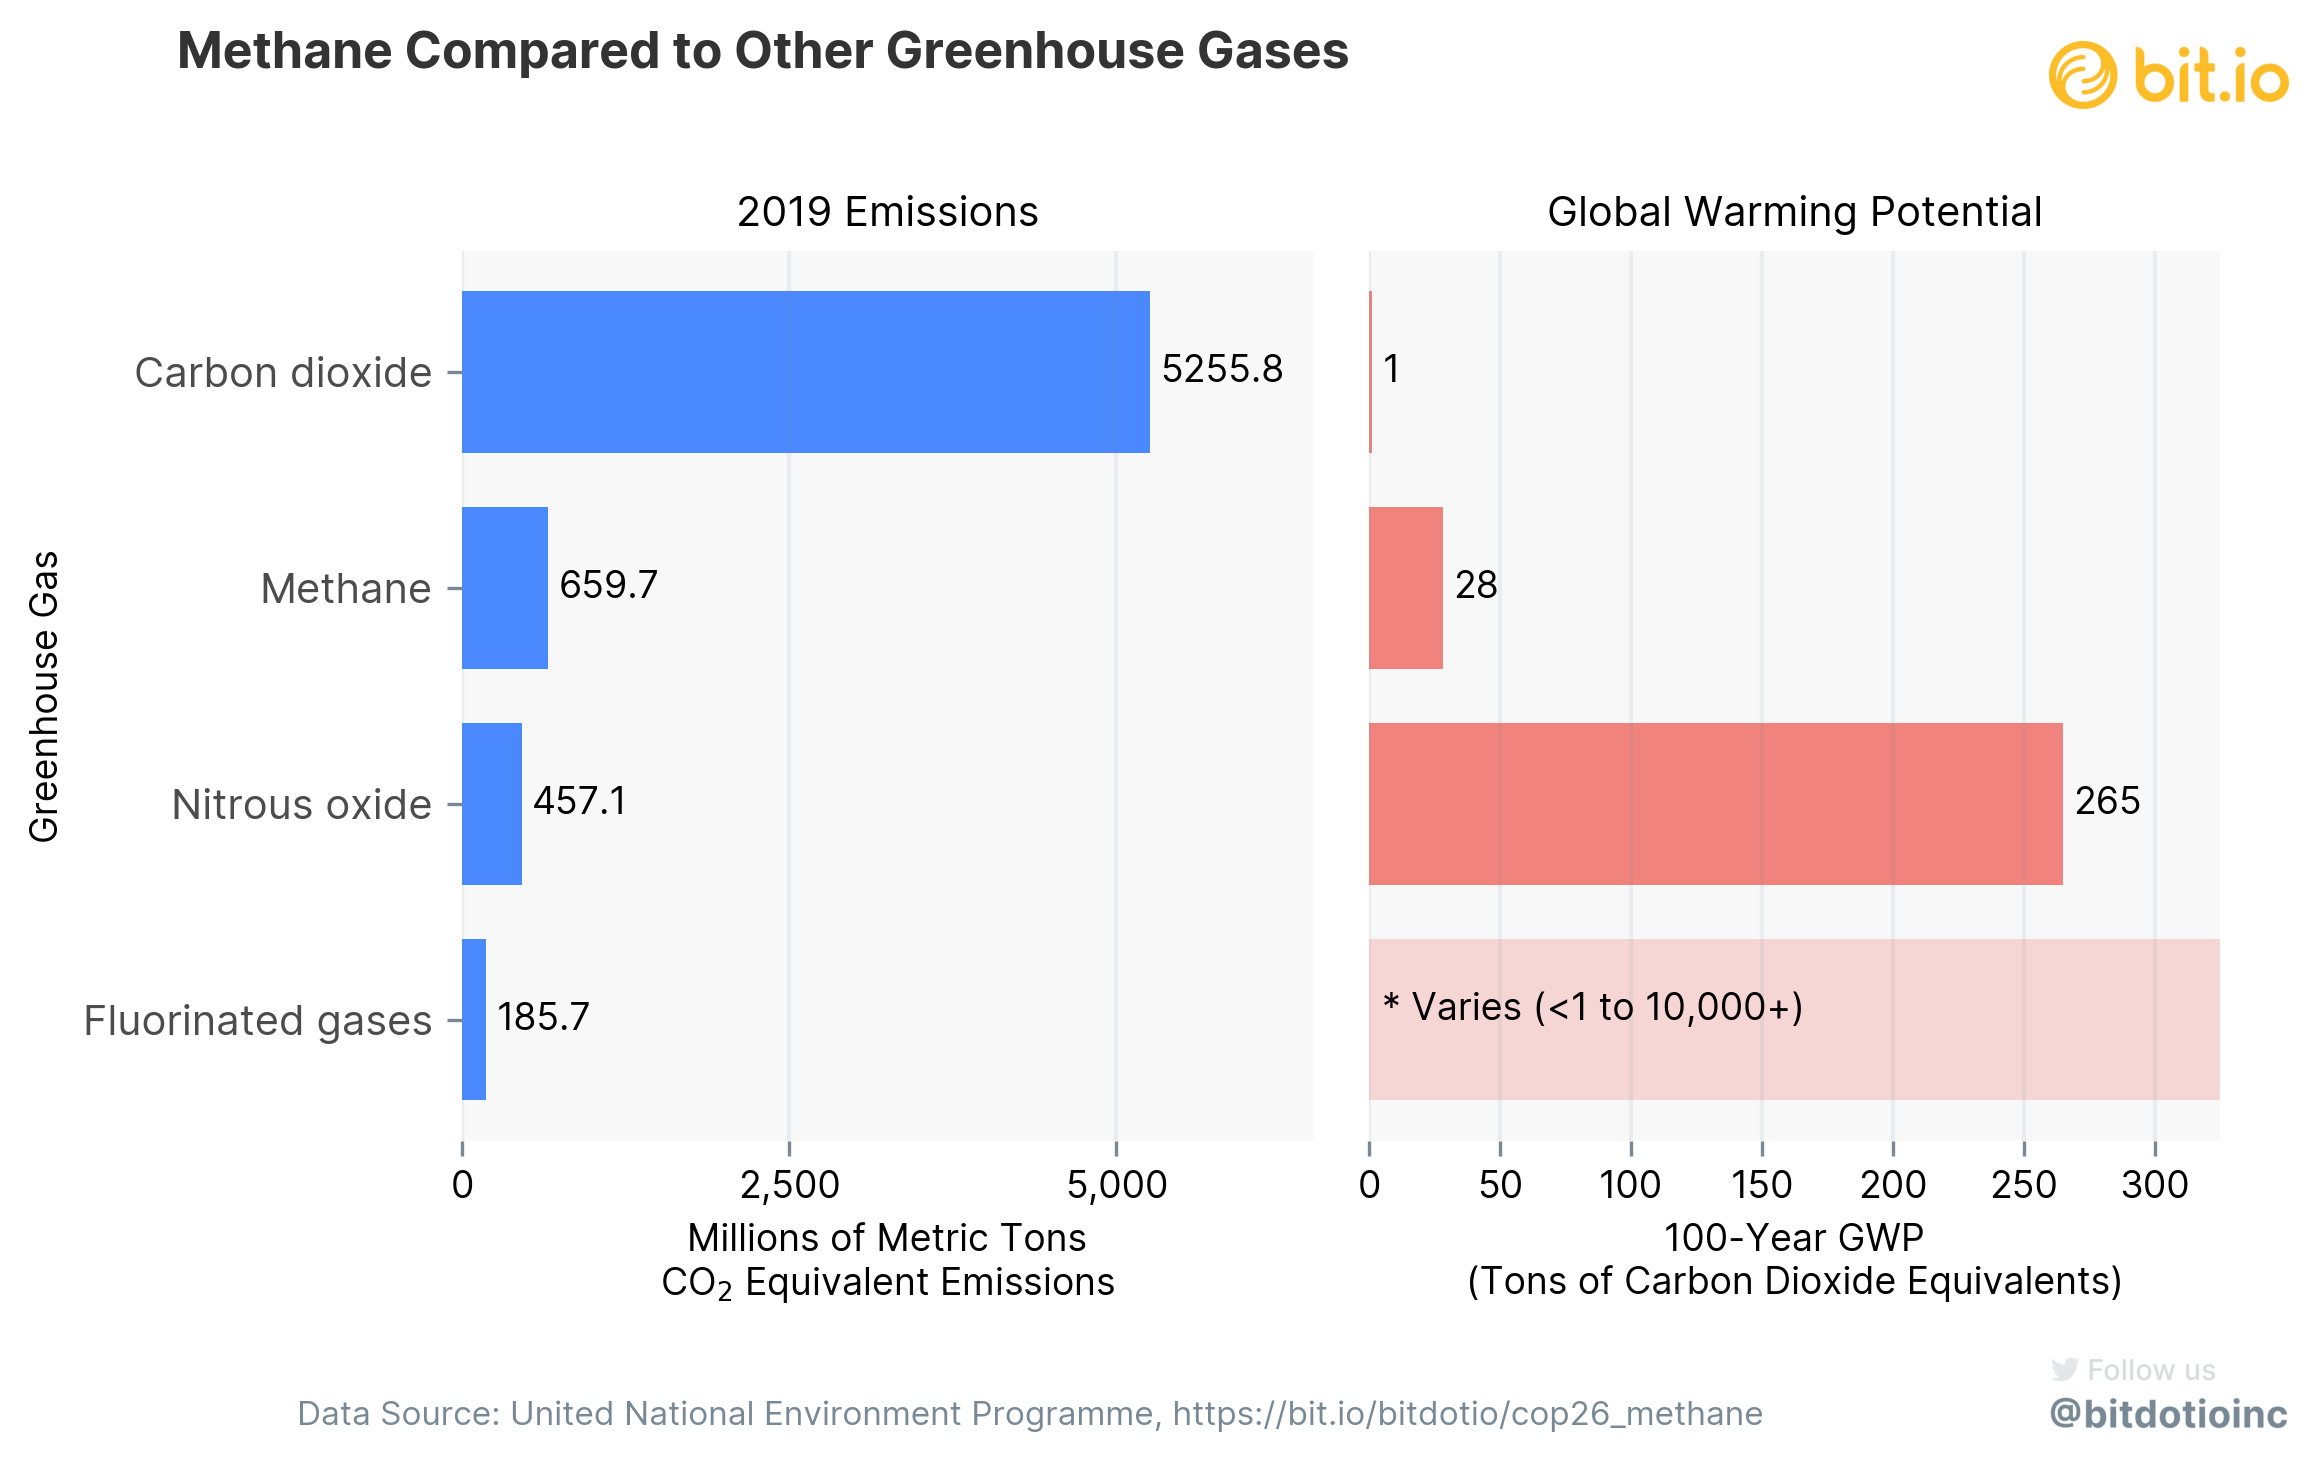

In [176]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5), dpi=300)

bar1 = ax[0].barh(y="gas", width="mmt_co2_eq", data=gases_2019, color=BLUE, alpha=0.7, height=0.75)#, edgecolor="black")
bar2 = ax[1].barh(y="gas", width="AR5", data=gases_2019, color=RED, alpha=0.7, height=0.75)#, edgecolor="black")

ax[0].invert_yaxis()
ax[1].invert_yaxis()

ax[0].set_xlim(0,6500)
ax[1].set_xlim(0, 325)

ax[0].set_title("2019 Emissions", fontfamily="Inter", size=10)
ax[1].set_title("Global Warming Potential", fontfamily="Inter", size=10)

ann1 = ax[0].bar_label(bar1, fontfamily="Inter", size=9, fmt="%.1f", padding = 2.5)
ann2 = ax[1].bar_label(bar2, fontfamily="Inter", size=9, padding = 2.5)
ax[1].texts.remove(ax[1].texts[3])
ax[1].text(5,3,"* Varies (<1 to 10,000+)", fontfamily="Inter", size=9)

# emphasize methane



ax[1].patches[3].set_alpha(0.2)

for a in ax:
    # X axis
    a.tick_params(axis='x', which='major', labelsize=9)
    a.patch.set_facecolor(GREY)
    a.patch.set_alpha(0.05)
    a.tick_params(axis='x', which='major', labelsize=9)
    a.grid(b=True, axis="x", color=GREY, alpha=0.1, linewidth=1)
    for t in a.get_yticklabels():
        t.set_alpha(0.7)
    
ax[0].get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax[0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(2500))


ax[1].set_xlabel("100-Year GWP\n(Tons of Carbon Dioxide Equivalents)", fontfamily="Inter", size=9)
ax[0].set_xlabel("Millions of Metric Tons\nCO$_2$ Equivalent Emissions", fontfamily="Inter", size=9)

ax[0].set_ylabel("Greenhouse Gas", fontfamily="Inter", size=9)
ax[1].yaxis.set_ticks([])

# Formatting
img = Image.open('/Users/danielliden/Downloads/logo.png')
img2 = Image.open('/Users/danielliden/Downloads/twitter.png')


for spine in ['top', 'right', 'left', 'bottom']:
    for a in ax:
        a.spines[spine].set_visible(False)

for a in ax:
    a.tick_params(which='both', bottom=True, left=True, color=GREY)


fig.tight_layout(rect=[0.02,0.1,0.97,0.9]) 

fig.text(0.15, 0.05, "Data Source: United National Environment Programme, https://bit.io/bitdotio/cop26_methane", ha='left',
         fontdict={"family":"Inter", "size":8, "color":GREY})

fig.suptitle("Methane Compared to Other Greenhouse Gases", x=0.1, y=0.98,
             fontweight="bold", ha="left", fontdict={"family":"Inter", "size":8, "color":"black", "alpha":0.8})


# Fonts
mpl.rcParams['font.family'] = 'Inter'

# logos
logo = plt.axes([0.88,0.9, 0.1, 0.1], frameon=True) 
logo.imshow(img)
logo.axis('off')
logo.patch.set_facecolor("white")

twt = plt.axes([0.88,0.02, 0.1, 0.1], frameon=True) 
twt.imshow(img2)
twt.axis('off')
fig.patch.set_facecolor("white")

if not Path("../figures/").exists():
    Path("../figures/").mkdir()
plt.savefig("../figures/compare_methane.png")

# International Comparison

In [184]:
table_name = "unfccc_inventory"
engine = create_engine(os.getenv("PG_STRING"))
# SQL for querying an entire table
sql = f"""
    SELECT *
    FROM "bitdotio/cop26_methane"."{table_name}";
"""
# Return SQL query as a pandas dataframe
with engine.connect() as conn:
    # Set 1 minute statement timeout (units are milliseconds)
    conn.execute("SET statement_timeout = 60000;")
    ic = pd.read_sql(sql, conn)
    
ic["pct_change"] = ic["pct_change"].str.replace("%", "").astype(float)/100
ic.head()

,party,year,population_thousands,kt_co2_eq,per_capita_emissions,pct_change,notes
0,Annex I,1990,1179722.024,2481515.808,2.103475,0.0000,None
1,Annex I,1991,1186899.409,2439178.232,2.055084,-0.0171,None
2,Annex I,1992,1193668.159,2397632.683,2.008626,-0.0338,None
3,Annex I,1993,1200497.988,2352222.557,1.959372,-0.0521,None
4,Annex I,1994,1206277.361,2308265.648,1.913545,-0.0698,None


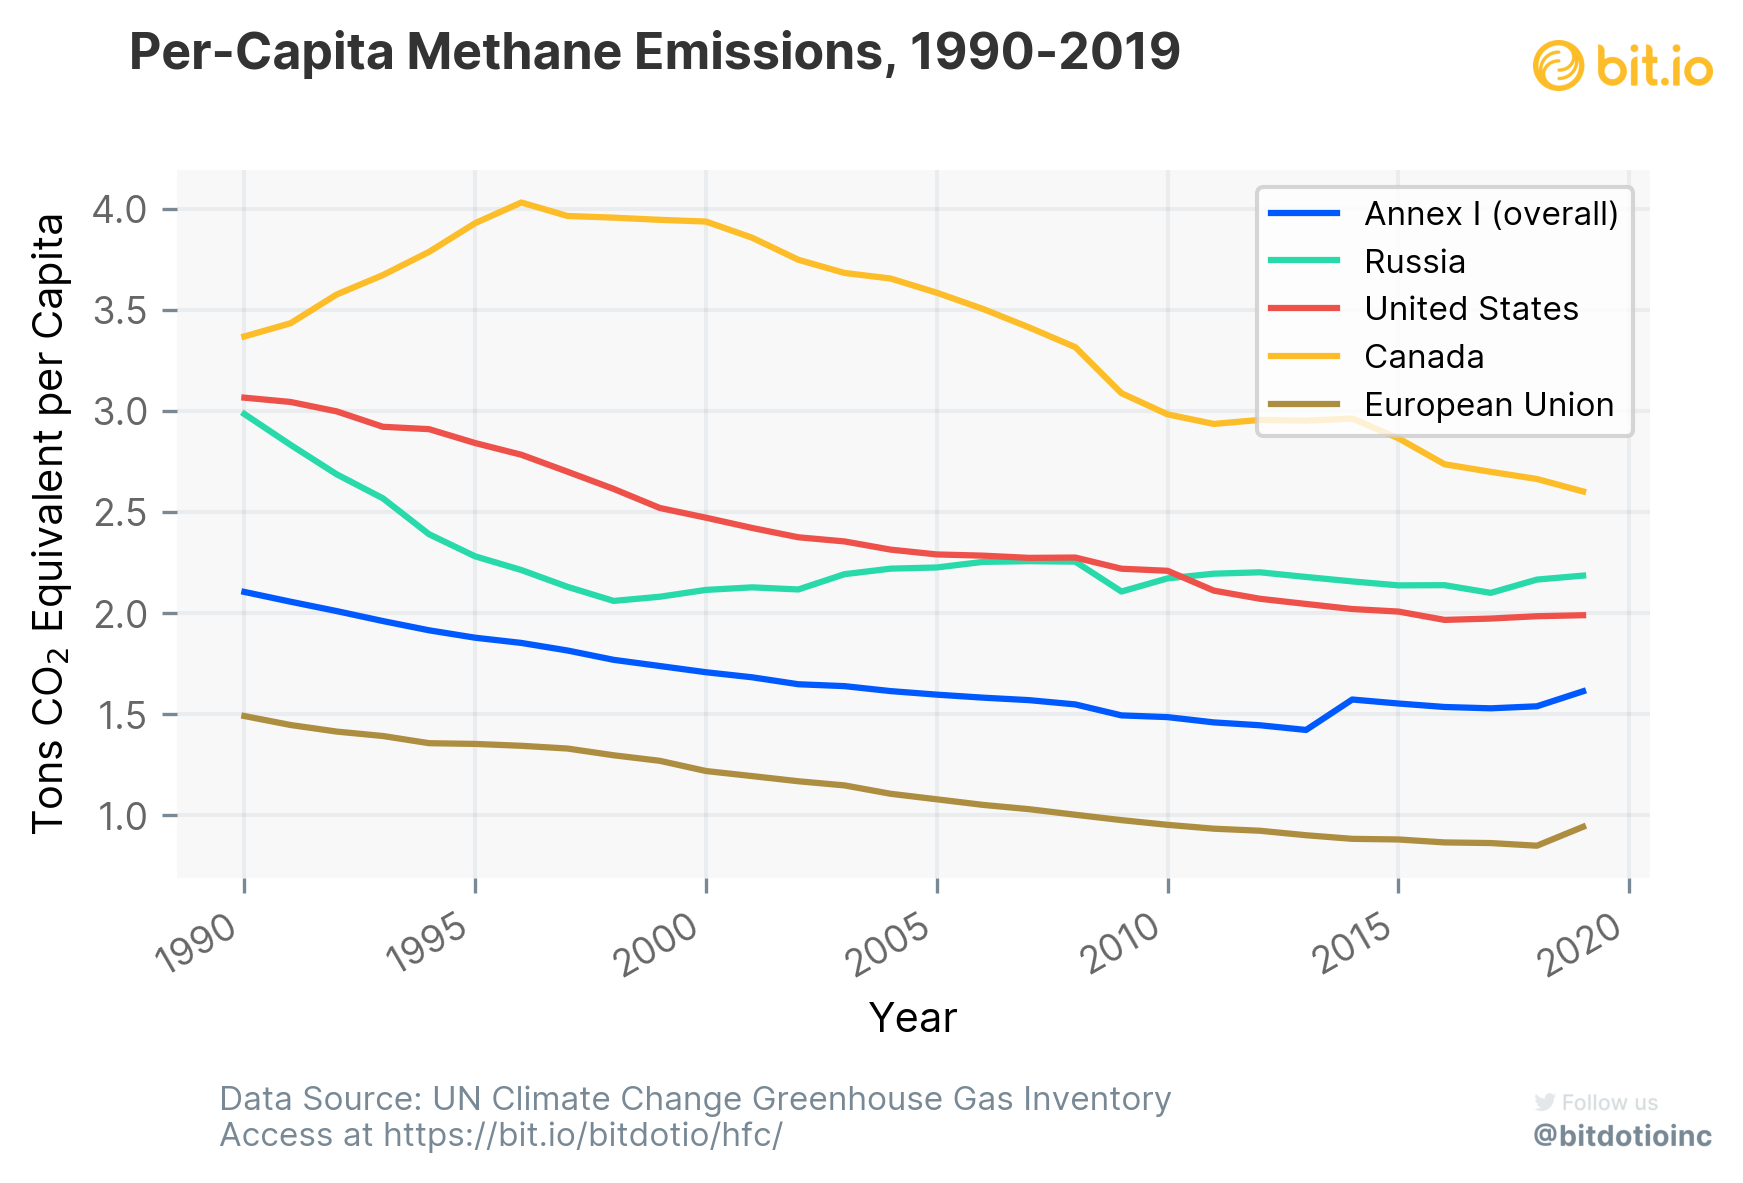

In [175]:
fig, ax = plt.subplots(figsize=(6,4), dpi=300)

# ax.axvline(2016.8, c="black", ls="-.", lw=0.75)
# ax.axvline(2010.999, c="black", ls="-.", lw=0.75)
# ax.axvline(2009.75, c="black", ls="-.", lw=0.75)


ax.plot("year", "per_capita_emissions", data=ic.loc[ic["party"]=="Annex I",:], c=BLUE, label = "Annex I (overall)")
ax.plot("year", "per_capita_emissions", data=ic.loc[ic["party"]=="Russian Federation",:], c=GREEN, label="Russia")
ax.plot("year", "per_capita_emissions", data=ic.loc[ic["party"]=="United States of America",:], c=RED, label="United States")
ax.plot("year", "per_capita_emissions", data=ic.loc[ic["party"]=="Canada",:], c=GOLD, label="Canada")
ax.plot("year", "per_capita_emissions", data=ic.loc[ic["party"]=="EU",:], c=METAL_SUN, label="European Union")
# X axis
ax.set_xlabel("Year")
ax.tick_params(axis='x', which='major', labelsize=9)
#loc = mpl.dates.YearLocator(2)
#ax.xaxis.set_major_locator(loc)
#ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%Y"))
ax.locator_params(axis='x', nbins=12)

ax.grid(b=True, color=GREY, alpha=0.1, linewidth=1)
ax.grid(b=True, axis="y", color=GREY, alpha=0.1, linewidth=1)
#ax.get_xaxis().set_major_formatter(
#    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(size=9, alpha=0.6)
fig.autofmt_xdate()

ax.patch.set_facecolor(GREY)
ax.patch.set_alpha(0.05)

# Y Axis
ax.set_ylabel("Tons CO$_2$ Equivalent per Capita")
ax.tick_params(axis='y', which='major', labelsize=9)
#ax.get_yaxis().set_major_formatter(
#    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.yticks(size=9, alpha=0.6)
#ax.set_ylim(0,510)

ax.legend(title=None, prop={"family":"inter", "size":8})

# Text
# ax.text(2016.9, 0.4, "Kigali Amendment\nAdopted", fontdict={"family":"Inter", "size":7, "color":"black"})
# ax.text(2011.1, 0.35, "Phaseout of\nCFCs Complete", fontdict={"family":"Inter", "size":7, "color":"black"})
# ax.text(2009.5, 0.3, "Montreal Protocol\nUniversally Ratified", fontdict={"family":"Inter", "size":7, "color":"black", "ha":"right"})


# Formatting
img = Image.open('/Users/danielliden/Downloads/logo.png')
img2 = Image.open('/Users/danielliden/Downloads/twitter.png')


for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(which='both', bottom=True, left=True, color=GREY)


fig.tight_layout(rect=[0.02,0.1,0.97,0.9]) 

fig.text(0.15, 0.05, "Data Source: UN Climate Change Greenhouse Gas Inventory\nAccess at https://bit.io/bitdotio/cop26_methane/", ha='left',
        fontdict={"family":"Inter", "size":8, "color":GREY})

fig.suptitle("Per-Capita Methane Emissions, 1990-2019", x=0.1, y=0.98,
             fontweight="bold", ha="left", fontdict={"family":"Inter", "size":8, "color":"black", "alpha":0.8})

# Fonts
mpl.rcParams['font.family'] = 'Inter'

# logos
logo = plt.axes([0.88,0.9, 0.1, 0.1], frameon=True) 
logo.imshow(img)
logo.axis('off')
logo.patch.set_facecolor("white")

twt = plt.axes([0.88,0.02, 0.1, 0.1], frameon=True) 
twt.imshow(img2)
twt.axis('off')
fig.patch.set_facecolor("white")
if not Path("../figures/").exists():
    Path("../figures/").mkdir()
plt.savefig("../figures/per_cap_methane.png")

plt.show()

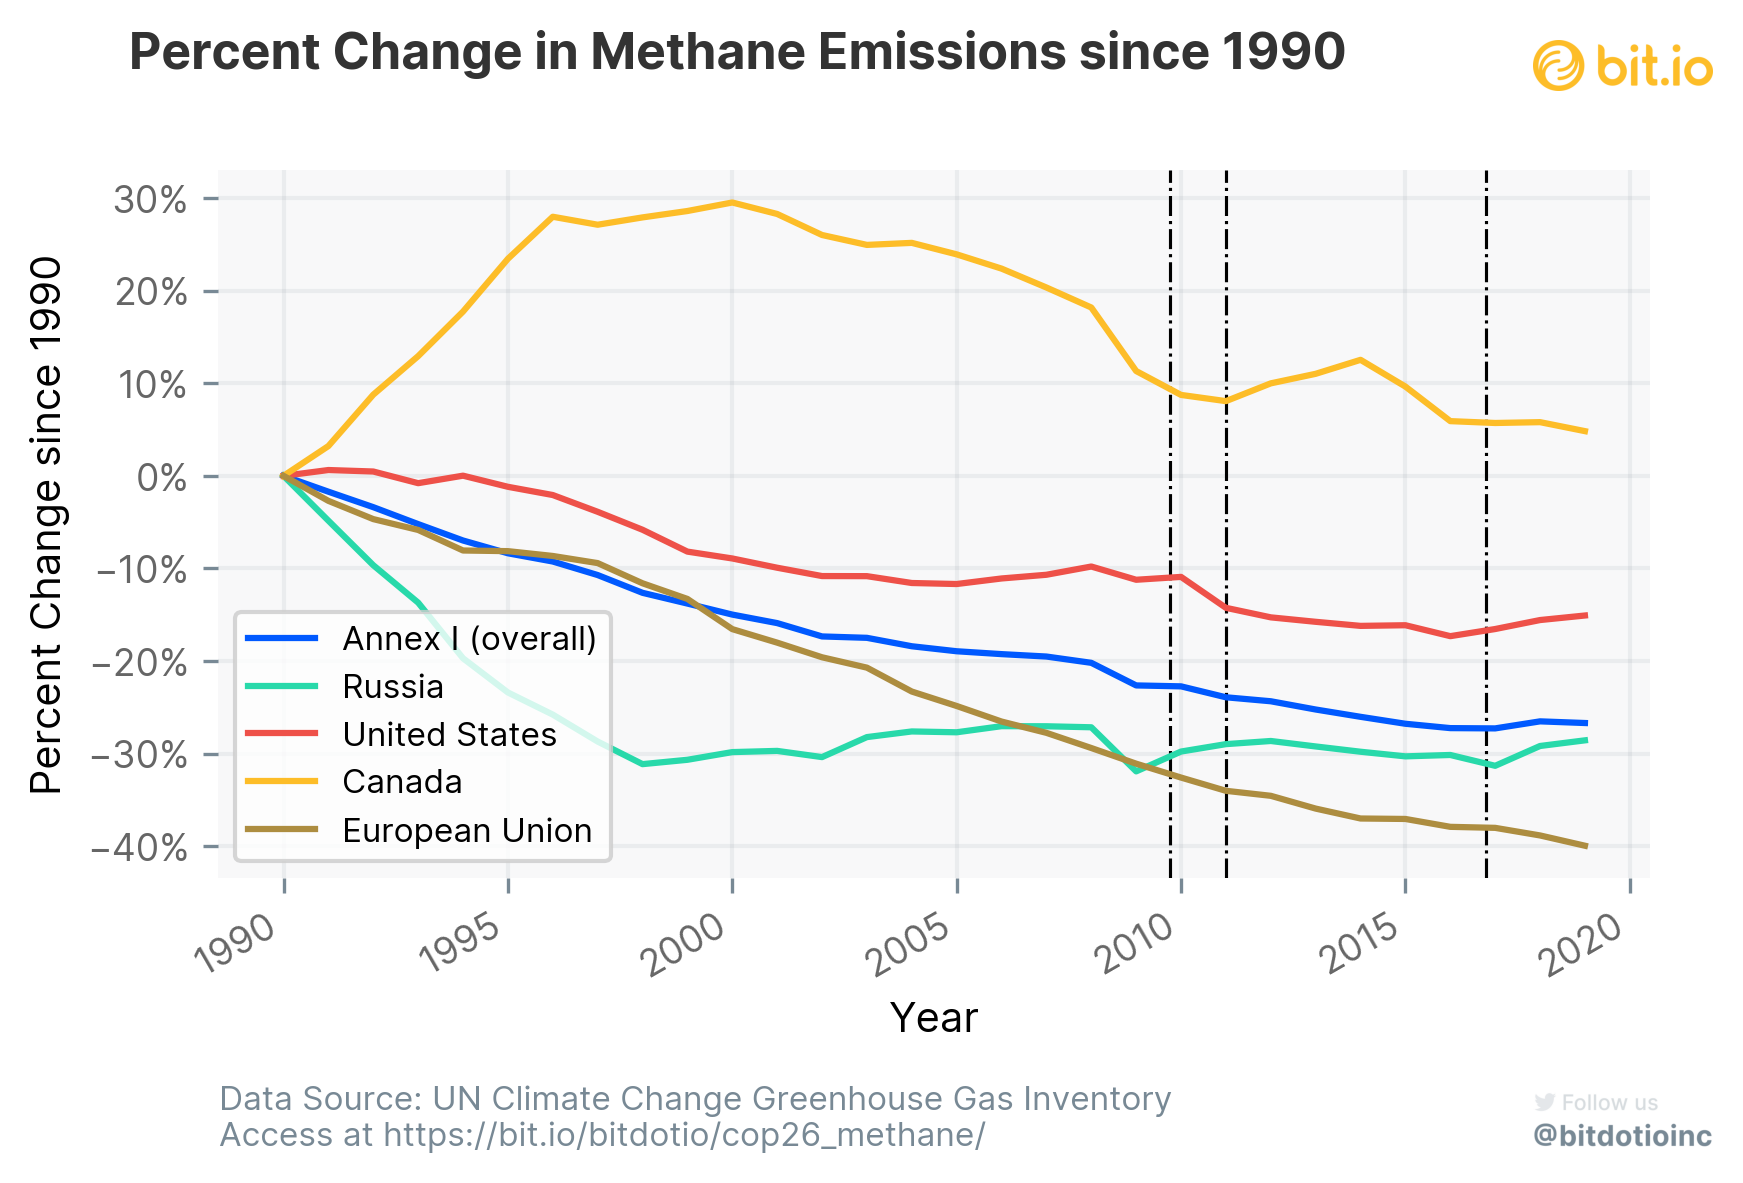

In [187]:
fig, ax = plt.subplots(figsize=(6,4), dpi=300)

ax.axvline(2016.8, c="black", ls="-.", lw=0.75)
ax.axvline(2010.999, c="black", ls="-.", lw=0.75)
ax.axvline(2009.75, c="black", ls="-.", lw=0.75)

ax.plot("year", "pct_change", data=ic.loc[ic["party"]=="Annex I",:], c=BLUE, label = "Annex I (overall)")
ax.plot("year", "pct_change", data=ic.loc[ic["party"]=="Russian Federation",:], c=GREEN, label="Russia")
ax.plot("year", "pct_change", data=ic.loc[ic["party"]=="United States of America",:], c=RED, label="United States")
ax.plot("year", "pct_change", data=ic.loc[ic["party"]=="Canada",:], c=GOLD, label="Canada")
ax.plot("year", "pct_change", data=ic.loc[ic["party"]=="EU",:], c=METAL_SUN, label="European Union")

# X axis
ax.set_xlabel("Year")
ax.tick_params(axis='x', which='major', labelsize=9)
#loc = mpl.dates.YearLocator(2)
#ax.xaxis.set_major_locator(loc)
#ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%Y"))
ax.locator_params(axis='x', nbins=12)

ax.grid(b=True, color=GREY, alpha=0.1, linewidth=1)
ax.grid(b=True, axis="y", color=GREY, alpha=0.1, linewidth=1)
#ax.get_xaxis().set_major_formatter(
#    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(size=9, alpha=0.6)
fig.autofmt_xdate()

ax.patch.set_facecolor(GREY)
ax.patch.set_alpha(0.05)

# Y Axis
ax.set_ylabel("Percent Change since 1990")
ax.tick_params(axis='y', which='major', labelsize=9)
ax.get_yaxis().set_major_formatter(
    mpl.ticker.PercentFormatter(xmax=1))
plt.yticks(size=9, alpha=0.6)
#ax.set_ylim(0,510)

ax.legend(title=None, prop={"family":"inter", "size":8})


# Formatting
img = Image.open('/Users/danielliden/Downloads/logo.png')
img2 = Image.open('/Users/danielliden/Downloads/twitter.png')


for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(which='both', bottom=True, left=True, color=GREY)


fig.tight_layout(rect=[0.02,0.1,0.97,0.9]) 

fig.text(0.15, 0.05, "Data Source: UN Climate Change Greenhouse Gas Inventory\nAccess at https://bit.io/bitdotio/cop26_methane/", ha='left',
        fontdict={"family":"Inter", "size":8, "color":GREY})

fig.suptitle("Percent Change in Methane Emissions since 1990", x=0.1, y=0.98,
             fontweight="bold", ha="left", fontdict={"family":"Inter", "size":8, "color":"black", "alpha":0.8})

# Fonts
mpl.rcParams['font.family'] = 'Inter'

# logos
logo = plt.axes([0.88,0.9, 0.1, 0.1], frameon=True) 
logo.imshow(img)
logo.axis('off')
logo.patch.set_facecolor("white")

twt = plt.axes([0.88,0.02, 0.1, 0.1], frameon=True) 
twt.imshow(img2)
twt.axis('off')
fig.patch.set_facecolor("white")
if not Path("../figures/").exists():
   Path("../figures/").mkdir()
plt.savefig("../figures/methane_pct_change.png")

plt.show()